In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
import qubit_templates
from qubit_templates import *
from functions import *
import ChipDesign
from ChipDesign import *

# Read configuration file

In [3]:
outname = "TcSampleDesign_grid"

config = load_config( f"config/common_Tc.yaml" )
# グローバル変数として定義
globals().update(config)
qubit_templates.__dict__.update(config)
ChipDesign.__dict__.update(config)

# Wafer design

In [4]:
wafer = device_Wafer(inch = 4)

# Place chip designs

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


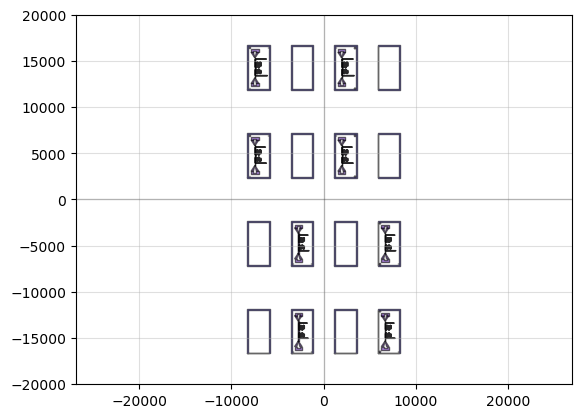

In [5]:
def custom_chip(name, x, y):
    return globals()[f"chipdesign_{name}"](y)

if Grid_sweep_type == "array":
    device_list = []
    for row in Grid_sweep_array:
        for cell in row:
            device_list.append( custom_chip(Grid_name, None, cell))
    D = pg.grid(
        device_list,
        spacing = (Grid_gap_x * Frame_size_width, Grid_gap_y * Frame_size_height),
        shape = np.array(Grid_sweep_array, dtype=object).shape
    )
elif Grid_sweep_type == "gridsweep":
    D = pg.gridsweep(
        function = custom_chip,
        param_x = {'x' : Grid_sweep_dummy},
        param_y = {'y' : Grid_sweep_frequency},
        param_defaults = {'name' : Grid_name}, 
        spacing = (Grid_gap_x * Frame_size_width, Grid_gap_y * Frame_size_height),
        label_layer = None
        )
D.center = (0,0)

## Remove corners
# for iref, ref in enumerate(D.references[:]):
#     if iref == 0 or iref == len(Grid_width)-1 or iref == len(Grid_width) * (len(Grid_height)-1) or iref == len(Grid_width) * len(Grid_height) - 1:
#         D.remove(ref)

wafer.add_ref(D)
qp(D)


# Add grid lines

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


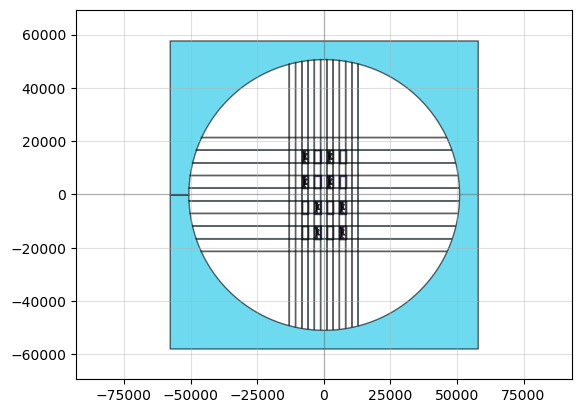

In [6]:
grid = device_Grid()
wafer.add_ref( grid )

qp(wafer)


In [7]:
wafer.write_gds('output/' + outname)

'output/TcSampleDesign_grid.gds'